# Analyzing and Forecasting Time Series Data

### This script contains the following points:
## Part 1 - Analyzing Time Series Data 
### 01. Importing libraries
### 02. Importing Data
### 03. Subsetting, wrangling, and cleaning time-series data
### 04. Time series analysis: decomposition
### 05. Testing for stationarity
### 06. Testing for autocorrelation
## Part 2 - Time Series Forecasting
### 01. Defining the Parameters
### 02. Splitting the Data
### 03. Running and Fitting the Model
### 04. Iterating

# Part 1 - Analyzing Time Series Data - Distribution of failure occurrences over time

## 01. Importing libraries

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

## 02. Importing Data

In [2]:
# Define path
%run env_1.ipynb
path = path_1

In [3]:
#Import dataset 1
df_pipes_failures_merged = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'pipes_failures_merged.xlsx'), index_col = False)

In [4]:
df_pipes_failures_merged.head()

,Unnamed: 0,id_pipeline,year_installation,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity,id_failure,failure_reported_on,cause_of_damage
0,0,1458131,1915.0,98.0,96.092,500,2,0,4,1.0,2,1,1213,1947-09-05,NaN
1,1,1864802,1899.0,114.0,69.417,400,2,3,3,1.0,1,1,1472,1987-10-13,NaN
2,2,1879790,1970.0,43.0,885.750,400,3,4,1,3.0,1,4,82300002/1563,2012-12-03,3.0
3,3,1792585,1987.0,26.0,12.789,400,3,5,3,1.0,3,3,1899,1987-10-05,NaN
4,4,1830979,1967.0,46.0,129.598,400,3,0,4,1.0,1,3,1513,1994-09-30,NaN


In [5]:
df_pipes_failures_merged.columns

Index(['Unnamed: 0', 'id_pipeline', 'year_installation', 'pipe_age_2013',
       'length', 'diameter', 'material', 'soil_consistency',
       'soil_aggressivity', 'groundwater', 'traffic_load', 'stray_electricity',
       'id_failure', 'failure_reported_on', 'cause_of_damage'],
      dtype='object')

In [6]:
#  Create new column ('failures_count_per_date') containing the count of failures for each date
df_pipes_failures_merged['failures_count'] = df_pipes_failures_merged.groupby('failure_reported_on')['id_failure'].transform('count')

In [7]:
type(df_pipes_failures_merged)

pandas.core.frame.DataFrame

In [8]:
df_pipes_failures_merged.head()

,Unnamed: 0,id_pipeline,year_installation,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity,id_failure,failure_reported_on,cause_of_damage,failures_count
0,0,1458131,1915.0,98.0,96.092,500,2,0,4,1.0,2,1,1213,1947-09-05,NaN,1.0
1,1,1864802,1899.0,114.0,69.417,400,2,3,3,1.0,1,1,1472,1987-10-13,NaN,1.0
2,2,1879790,1970.0,43.0,885.750,400,3,4,1,3.0,1,4,82300002/1563,2012-12-03,3.0,1.0
3,3,1792585,1987.0,26.0,12.789,400,3,5,3,1.0,3,3,1899,1987-10-05,NaN,1.0
4,4,1830979,1967.0,46.0,129.598,400,3,0,4,1.0,1,3,1513,1994-09-30,NaN,1.0


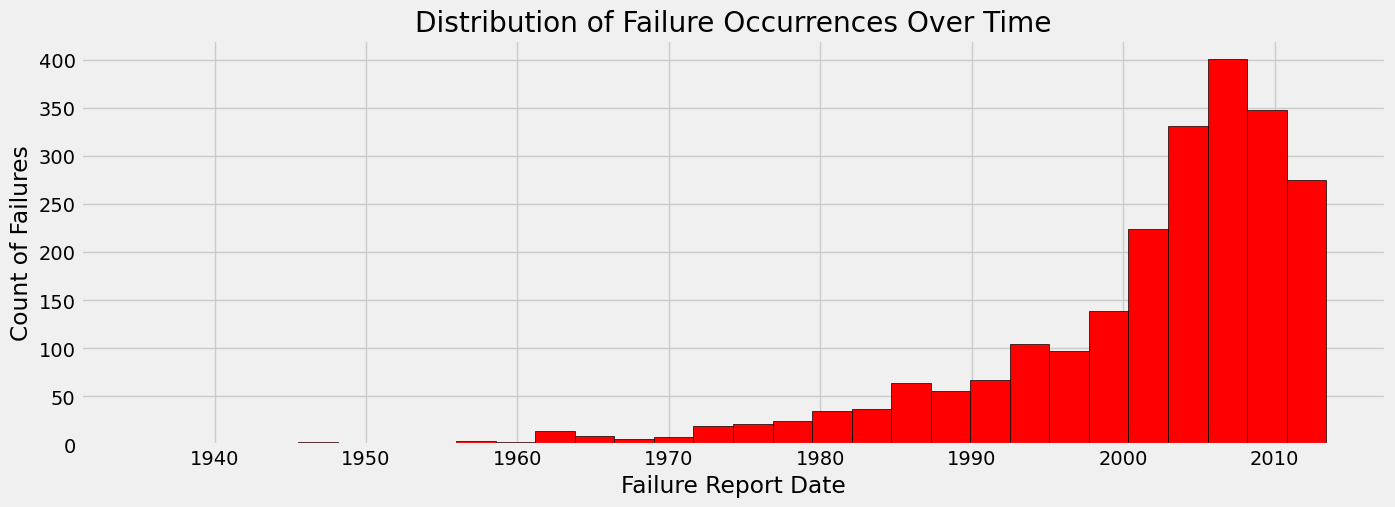

In [9]:
# Plot the data using matplotlib
plt.figure(figsize=(15, 5), dpi=100)

# Plotting a histogram of failure occurrences
plt.hist(df_pipes_failures_merged['failure_reported_on'], bins=30, color='red', edgecolor='black')

# Adding labels and title
plt.xlabel('Failure Report Date')
plt.ylabel('Count of Failures')
plt.title('Distribution of Failure Occurrences Over Time')

# Show the plot
plt.show()

## 03. Wrangling, subsetting and cleaning time-series data

### Wrangling time-series data

In [10]:
# For the Time Series analysis I will use 'failure_reported_on' and 'pipe_age_2013' columns
selected_columns = ['failure_reported_on', 'id_failure', 'failures_count']

In [11]:
df_date_failures = df_pipes_failures_merged[selected_columns]

In [12]:
df_date_failures.head()

,failure_reported_on,id_failure,failures_count
0,1947-09-05,1213,1.0
1,1987-10-13,1472,1.0
2,2012-12-03,82300002/1563,1.0
3,1987-10-05,1899,1.0
4,1994-09-30,1513,1.0


### Subsetting time-series data
#### Note: The water utility's database contains records of pipe damage dating back to 1935, but regrettably, not all pipe failures between 1935 and 2001 were documented. Reliable datasets become available starting from the year 2001.

In [13]:
# Reset index so that the "failure_reported_on" column can be used as a filter
df_date_failures_2 = df_date_failures.reset_index()

In [14]:
# Create a subset for the period 2001-2012
df_subset = df_date_failures_2.loc[(df_date_failures_2['failure_reported_on'] >= '2001-01-01') & (df_date_failures_2['failure_reported_on'] < '2013-01-01')]

In [15]:
df_subset.shape

(1531, 4)

In [16]:
df_subset.head()

,index,failure_reported_on,id_failure,failures_count
2,2,2012-12-03,82300002/1563,1.0
5,5,2012-12-13,82300002/1568,1.0
6,6,2007-07-24,82300002/1085,1.0
8,8,2012-05-07,82300002/1515,1.0
11,11,2004-12-03,1837,2.0


In [17]:
df_subset.columns

Index(['index', 'failure_reported_on', 'id_failure', 'failures_count'], dtype='object')

In [18]:
# Reset the “failure_reported_on” column as the index of the new dataframe

from datetime import datetime

df_subset['datetime'] = pd.to_datetime(df_subset['failure_reported_on']) # Create a datetime column from 'failure_reported_on'
df_subset = df_subset.set_index('datetime') # Set the datetime as the index of the dataframe.
df_subset.drop(['failure_reported_on'], axis=1, inplace=True)  # Drop the "failure_reported_on" column
df_subset.head()

,index,id_failure,failures_count
datetime,,,
2012-12-03,2,82300002/1563,1.0
2012-12-13,5,82300002/1568,1.0
2007-07-24,6,82300002/1085,1.0
2012-05-07,8,82300002/1515,1.0
2004-12-03,11,1837,2.0


In [19]:
df_subset.drop(['index'], axis=1, inplace=True)
df_subset.head()

,id_failure,failures_count
datetime,,
2012-12-03,82300002/1563,1.0
2012-12-13,82300002/1568,1.0
2007-07-24,82300002/1085,1.0
2012-05-07,82300002/1515,1.0
2004-12-03,1837,2.0


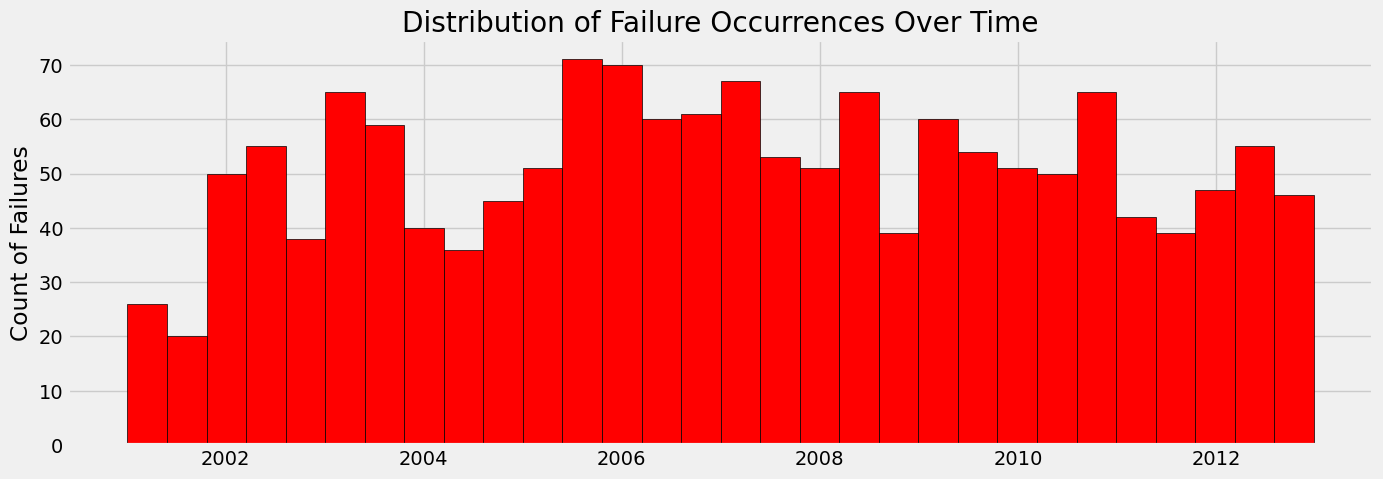

In [20]:
# Plotting a histogram of failure occurrences
plt.figure(figsize=(15, 5), dpi=100)
plt.hist(df_subset.index, bins=30, color='red', edgecolor='black')

# Adding labels and title
plt.ylabel('Count of Failures')
plt.title('Distribution of Failure Occurrences Over Time')

# Save the plot as an image file (e.g., PNG)
plt.savefig('Failure_Occurrences_Histogram.png', bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()

### Cleaning time-series data

In [21]:
# Check for missing values (you shouldn't have any)

df_subset.isnull().sum() 

id_failure        0
failures_count    0
dtype: int64

#### Observation: No missing values

In [22]:
df_subset.shape

(1531, 2)

In [23]:
# Check for duplicates in the id_failure column (other columns can have same values)
id_failure_dups = df_subset['id_failure'].duplicated()
id_failure_dups.sum()

44

#### Observation: There are 44 duplicated rows, that will be dropped.

In [24]:
# Create a DataFrame excluding duplicated rows based on the 'id_failure' column
df_subset_no_dup = df_subset.drop_duplicates(subset=['id_failure'])

# Display the new DataFrame
print(df_subset_no_dup)

               id_failure  failures_count
datetime                                 
2012-12-03  82300002/1563             1.0
2012-12-13  82300002/1568             1.0
2007-07-24  82300002/1085             1.0
2012-05-07  82300002/1515             1.0
2004-12-03           1837             2.0
...                   ...             ...
2008-04-10   82300159/430             3.0
2003-03-11   82300159/245             1.0
2002-02-05   82300159/213             1.0
2011-06-20   82300159/519             1.0
2005-06-27   82300151/561             1.0

[1487 rows x 2 columns]


In [25]:
df_subset_no_dup.head()

,id_failure,failures_count
datetime,,
2012-12-03,82300002/1563,1.0
2012-12-13,82300002/1568,1.0
2007-07-24,82300002/1085,1.0
2012-05-07,82300002/1515,1.0
2004-12-03,1837,2.0


In [26]:
df_subset_no_dup.drop('id_failure', axis=1, inplace=True)

In [27]:
df_failures = df_subset_no_dup

In [28]:
df_failures.head()

,failures_count
datetime,
2012-12-03,1.0
2012-12-13,1.0
2007-07-24,1.0
2012-05-07,1.0
2004-12-03,2.0


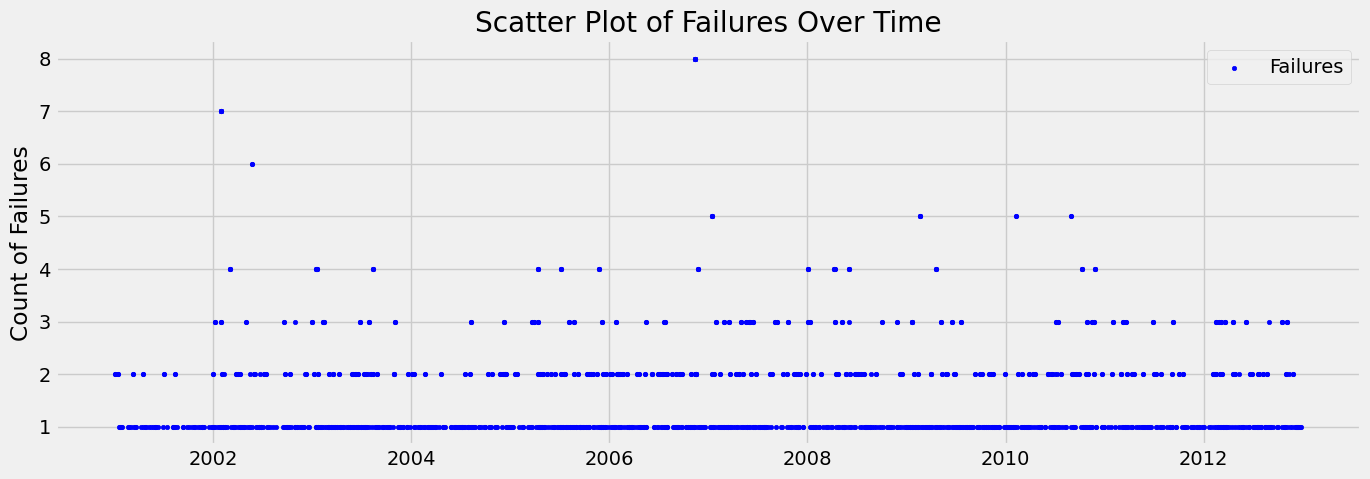

In [29]:
# Plot the new data set

plt.figure(figsize=(15, 5), dpi=100)
plt.scatter(df_failures.index, df_failures['failures_count'], s=10, color='blue', label='Failures')
plt.title('Scatter Plot of Failures Over Time')
plt.ylabel('Count of Failures')
plt.legend()
plt.show()

#### Observation: I need to aggregate/smooth data before any further analysis

## 04. Time-series analysis: Decomposition

### Smoothing the original time series before starting the analysis

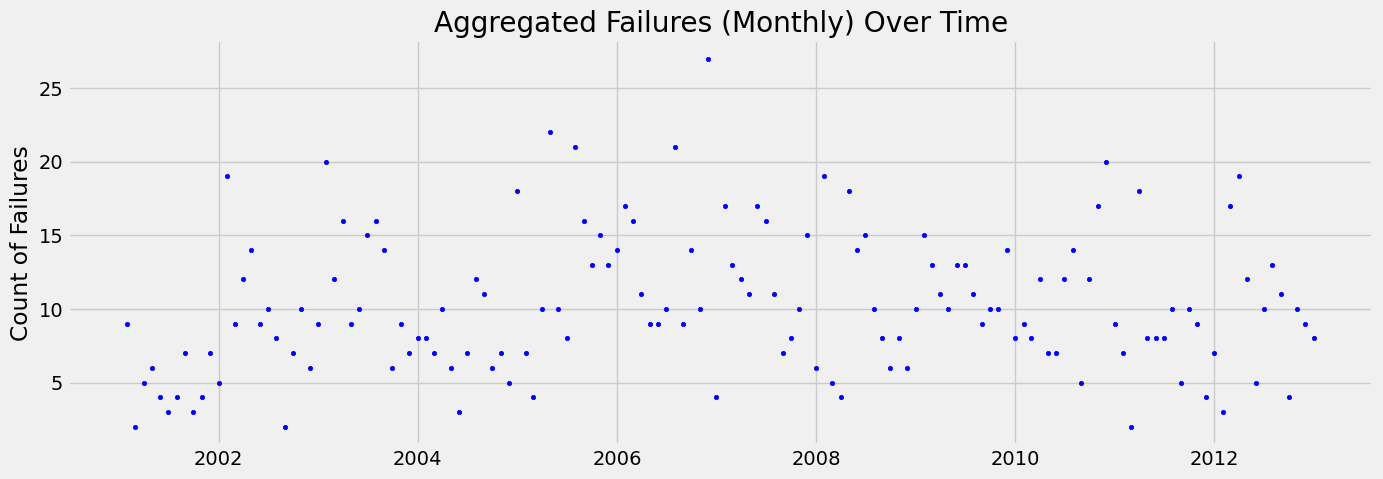

In [30]:
# Smooth the data using a rolling mean
window_size = 10  # Adjust the window size as needed
df_failures_smoothed = df_failures.rolling(window=window_size).mean().dropna()

# Aggregate the count of failures on a monthly basis after smoothing
df_failures_agg_monthly = df_failures_smoothed.resample('M').count()

# Scatter plot of the aggregated count of failures on a monthly basis after smoothing
plt.figure(figsize=(15, 5), dpi=100)
plt.scatter(df_failures_agg_monthly.index, df_failures_agg_monthly['failures_count'], s=10, color='blue', label='Aggregated Failures (Monthly)')
plt.title('Aggregated Failures (Monthly) Over Time')
plt.ylabel('Count of Failures')
plt.savefig('Scatter_Aggregated_Failures.png', bbox_inches='tight')
plt.show()

In [31]:
# Decompose the smoothed time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_failures_agg_monthly, model='additive')

In [32]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

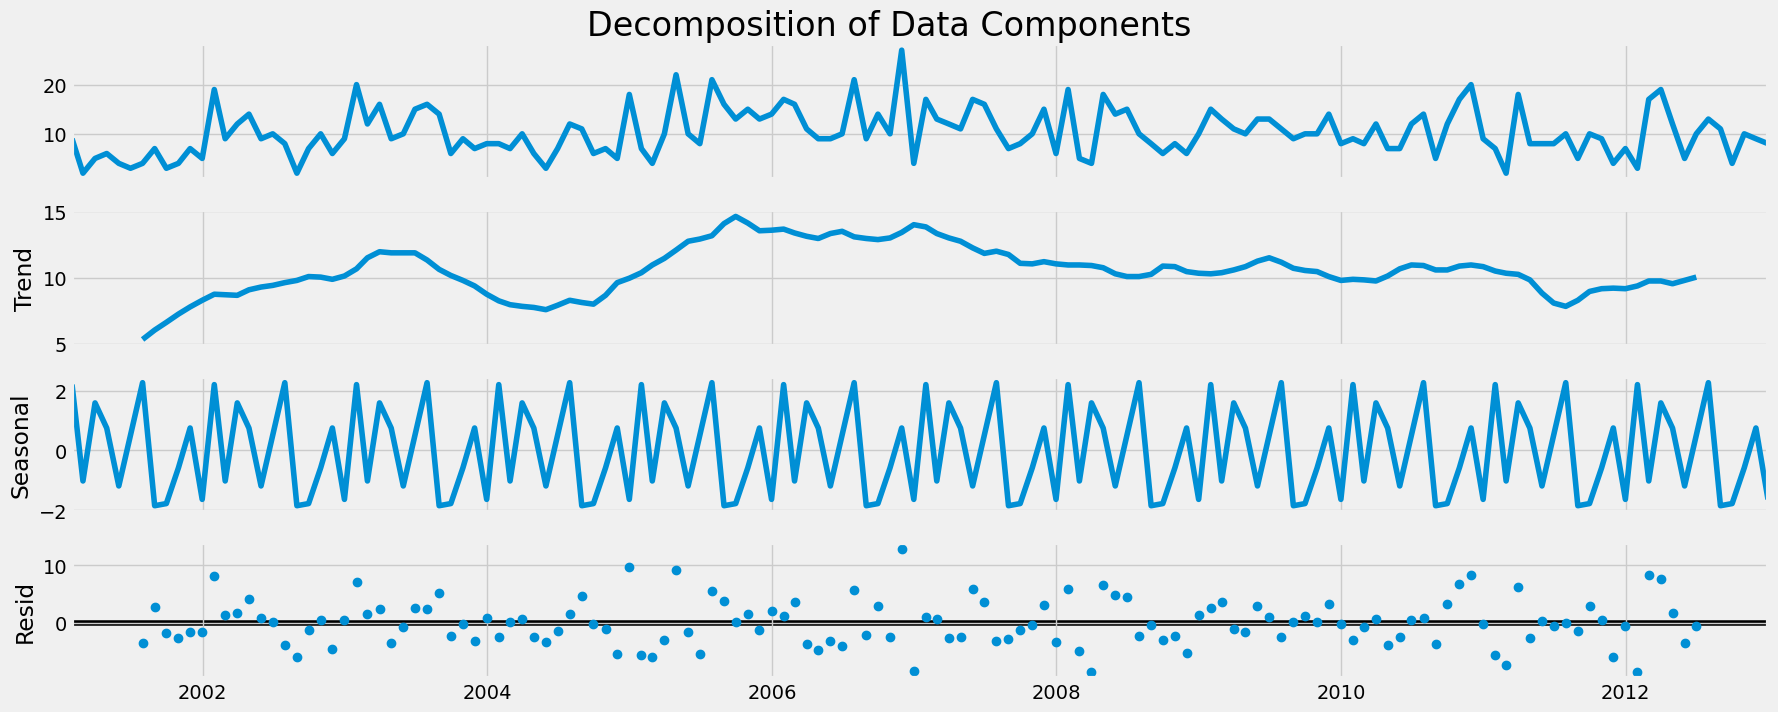

In [33]:
# Plot the separate components

decomposition.plot()
plt.suptitle('Decomposition of Data Components', fontsize=24, y=1.02)
plt.savefig('Decomposition.png', bbox_inches='tight')
plt.show()

### Observation: 
#### 01. The first chart in the figure above is the data itself (including all of its components). This is called the level.
#### 02. The second is the underlying trend. The level and trend of the data differ, because I have noise in the data. Noise represents any fluctuations that aren’t explained by the trend, so when the noise is removed (especially if there is a lot of it), the trend will likely differ. I wouldn't say that I can observe any trend in the data, which means the data are stationary, but anyhow I will perform stationarity test to make sure.
#### 03. The third component is the seasonality. Here, I see seasonal fluctuations represented by a spikey curve that changes at a regular interval. If I didn’t have any seasonality, the curve would be flat.
#### 04. The forth component is the noise—or, as it’s called here, “residual.” That is what’s left of the data after the trend and seasonality have been extracted (hence the term residual).

## 05. Testing for stationarity

### Use of  Dickey-Fuller  test, which is a statistical test that checks for the presence of a unit root 
#### Note: Disprove the Null Hypothesis  = no unit root = stationary data = can proceed with forecast
#### I can only forecast if your time series data is stationary! The null hypothesis in this case would be the presence of a unit root (I want to disprove that there’s a unit root, which would mean that the data is stationary)

In [34]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_failures_agg_monthly['failures_count'])

Dickey-Fuller Stationarity test:
Test Statistic                  -4.147709
p-value                          0.000807
Number of Lags Used              3.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64


### Observation: 
The test statistic (-4.147709) is smaller than the critical value (-3.477945), so I can reject the null hypothesis, which mean that the data is stationary. I also have a satisfactory p-value =  0.000807 (p<0.05).

## 06. Testing for autocorrelation

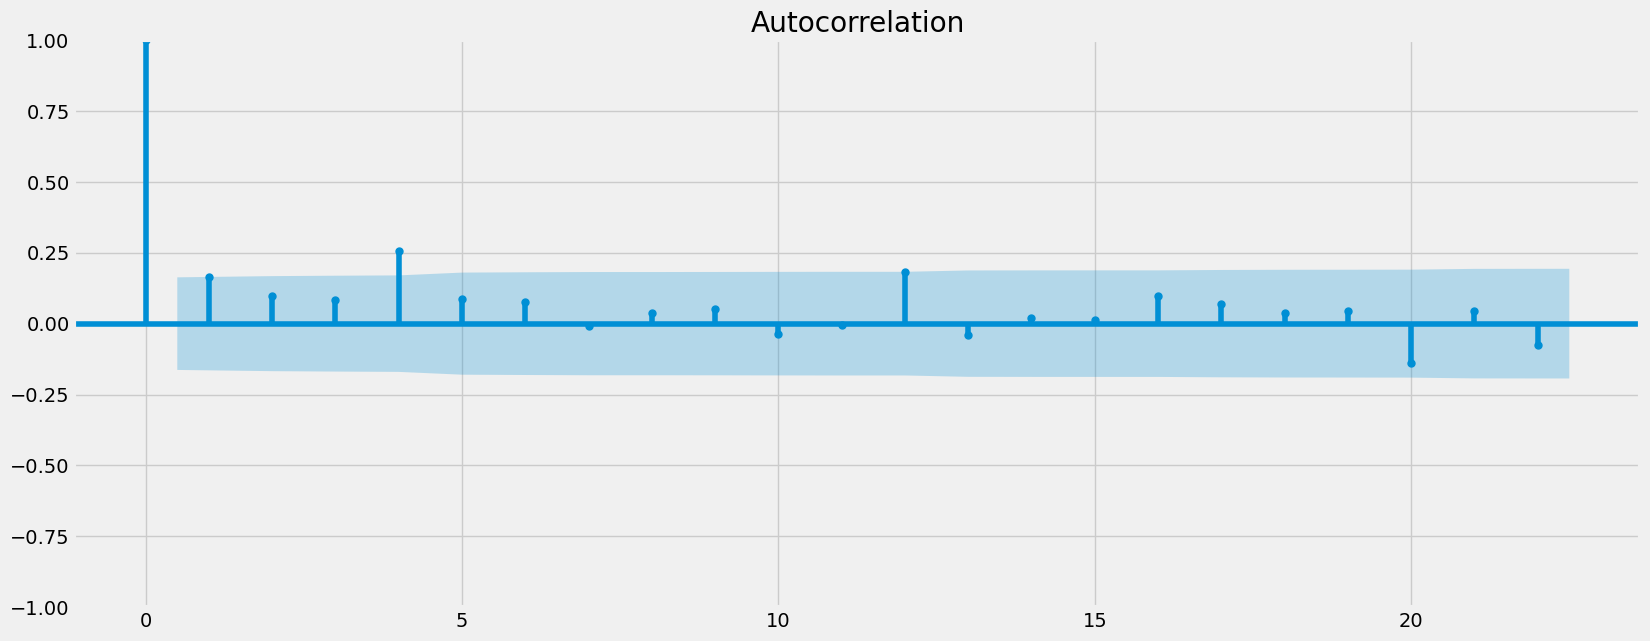

In [35]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_failures_agg_monthly)
plt.show()

### Observation:

Vertical Lines: These lines represent the lag values, indicating how many time periods in the past the correlation is calculated.

Blue Area (Confidence Interval): This area represents the confidence interval for the correlation values. If a vertical line crosses or goes beyond this area, it suggests that the correlation at that lag is statistically significant.

In this case most of the lines (lag values) don't go beyond the confidence interval, this means there isn't a lot of autocorrelated data and the set is likely stationary, which supports the result of the Dickey-Fuller test I conducted earlier.

# Part 2 -  Time Series Forecasting, Forecasting of failure occurrences

## 01. Defining Your Parameters

### 1.1 Parameter p -  the parameter responsible for the autoregressive part of the model (AR)

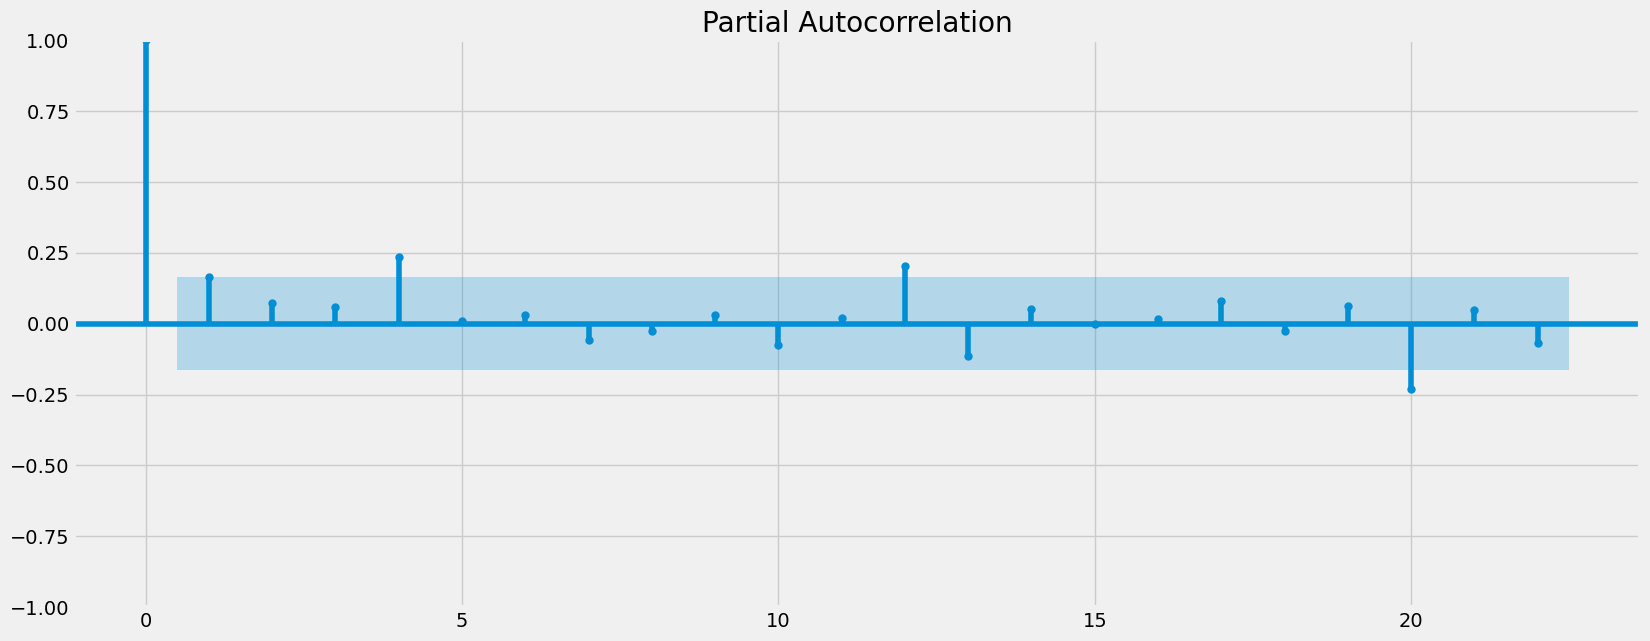

<Figure size 4500x4500 with 0 Axes>

In [36]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(df_failures_agg_monthly)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

### Observation: In the figure above, I can see one highly positive bar and as well 3-4  positive . These indicate significant correlations. I would start by picking 4 AR terms,  this makes p = 4.

### 1.2 Parameter q - the parameter that represents the MA order. 
### In order to determine it, I need to look at the autocorrelations plot (ACF) that i have at the end of the previuos part. In this case most of the lines (lag values) don't go beyond the confidence interval. Only two run beyond the blue border, this makes q = 2.

## 02. Splitting the Data

#### Note: In time series data, splitting by time is crucial to maintain the temporal order of observations. 
#### In this case, I will split the data after 2009.

In [37]:
df_failures_agg_monthly.index = pd.to_datetime(df_failures_agg_monthly.index)

# Split the data at the end of 2009
split_date = pd.to_datetime('2009-12-31')
train = df_failures_agg_monthly.loc[df_failures_agg_monthly.index <= split_date, 'failures_count']
test = df_failures_agg_monthly.loc[df_failures_agg_monthly.index > split_date, 'failures_count']

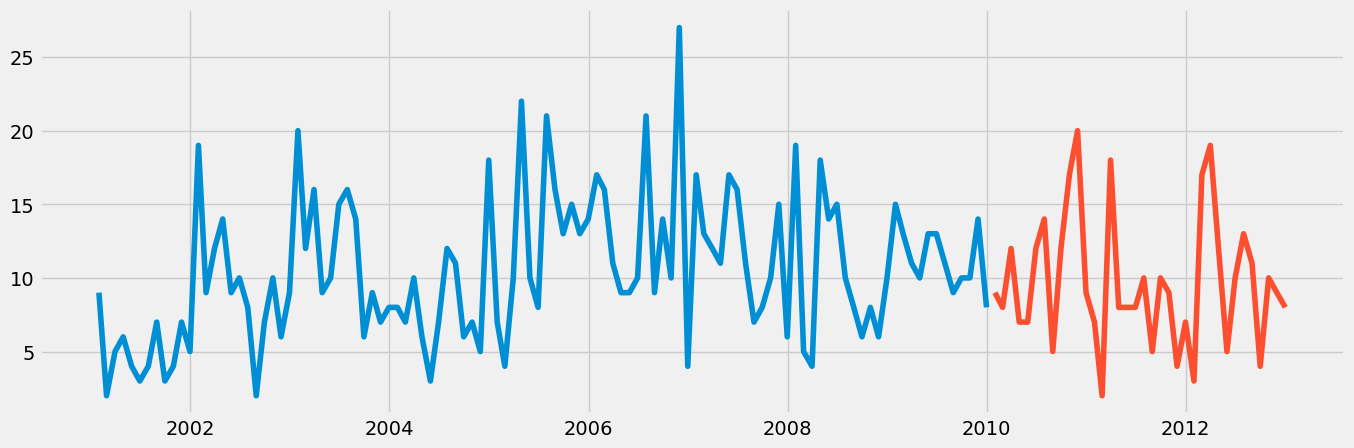

In [38]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [39]:
train.shape

(108,)

In [40]:
test.shape

(36,)

## 03. Running and Fitting the Model

In [41]:
from statsmodels.tsa.api import ARIMA # Import the model you need

                               SARIMAX Results                                
Dep. Variable:         failures_count   No. Observations:                  108
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -320.066
Date:                Fri, 08 Dec 2023   AIC                            654.132
Time:                        12:16:19   BIC                            672.907
Sample:                    01-31-2001   HQIC                           661.744
                         - 12-31-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1203      0.399      0.302      0.763      -0.661       0.902
ar.L2          0.7844      0.377      2.080      0.038       0.045       1.524
ar.L3          0.0133      0.133      0.099      0.9

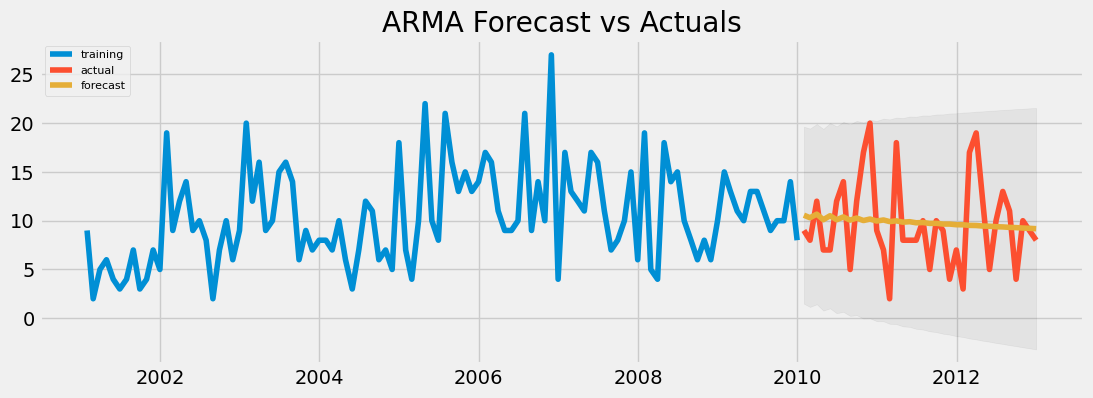

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARMA model using SARIMAX
model = SARIMAX(train, order=(4, 0, 2))
fitted = model.fit()

# Print model summary
print(fitted.summary())

# Forecast
fc = fitted.get_forecast(steps=41, alpha=0.05)
conf_int = fc.conf_int()

# Make into pandas series
fc_series = pd.Series(fc.predicted_mean, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('ARMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Observation: The summary highlights that only one coefficient, specifically ar.L2, is statistically significant, indicating the need for model refinement.
### Additionally, in the plot analysis, it is evident that the yellow line doesn't entirely coincide with the red line; however, both trajectories fall within the confidence interval. This suggests that the differences are not statistically significant, providing a promising initial assessment.

## 04. Iterating

                               SARIMAX Results                                
Dep. Variable:         failures_count   No. Observations:                  108
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -317.972
Date:                Fri, 08 Dec 2023   AIC                            649.944
Time:                        12:16:20   BIC                            668.719
Sample:                    01-31-2001   HQIC                           657.557
                         - 12-31-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4870      0.171     -2.844      0.004      -0.823      -0.151
ar.L2          0.6387      0.097      6.570      0.000       0.448       0.829
ar.L3          0.8399      0.163      5.137      0.0

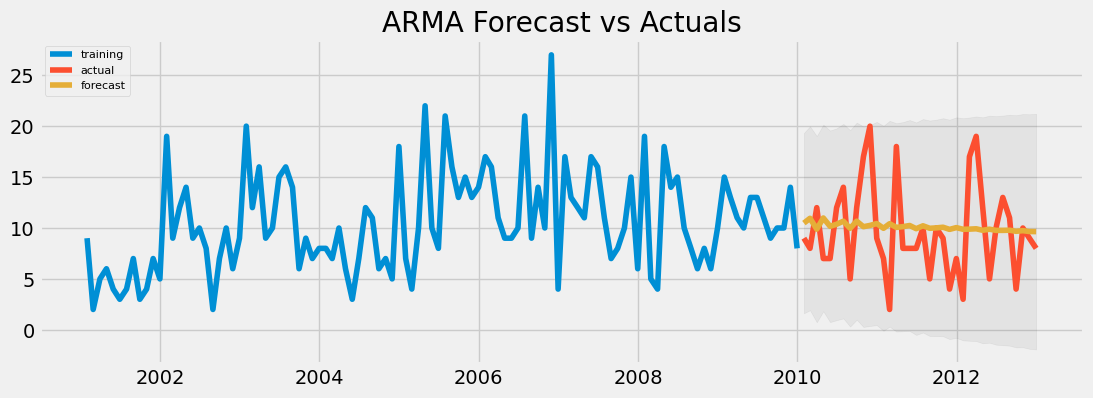

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARMA model using SARIMAX
model = SARIMAX(train, order=(3, 0, 3))
fitted = model.fit()

# Print model summary
print(fitted.summary())

# Forecast
fc = fitted.get_forecast(steps=41, alpha=0.05)
conf_int = fc.conf_int()

# Make into pandas series
fc_series = pd.Series(fc.predicted_mean, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('ARMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
# Save the plot as an image file (e.g., PNG)
plt.savefig('ARMA_Forecast_vs_Actuals.png', bbox_inches='tight')

# Show the plot
plt.show()

In [44]:
# Save the plot as an image file (e.g., PNG)
plt.savefig('ARMA_Forecast_vs_Actuals.png', bbox_inches='tight')

<Figure size 1800x700 with 0 Axes>

                               SARIMAX Results                                
Dep. Variable:         failures_count   No. Observations:                  108
Model:                 ARIMA(6, 0, 2)   Log Likelihood                -314.195
Date:                Fri, 08 Dec 2023   AIC                            648.390
Time:                        12:16:21   BIC                            675.211
Sample:                    01-31-2001   HQIC                           659.265
                         - 12-31-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4528      0.958     10.912      0.000       8.575      12.330
ar.L1         -0.8043      0.118     -6.828      0.000      -1.035      -0.573
ar.L2         -0.7166      0.155     -4.619      0.0

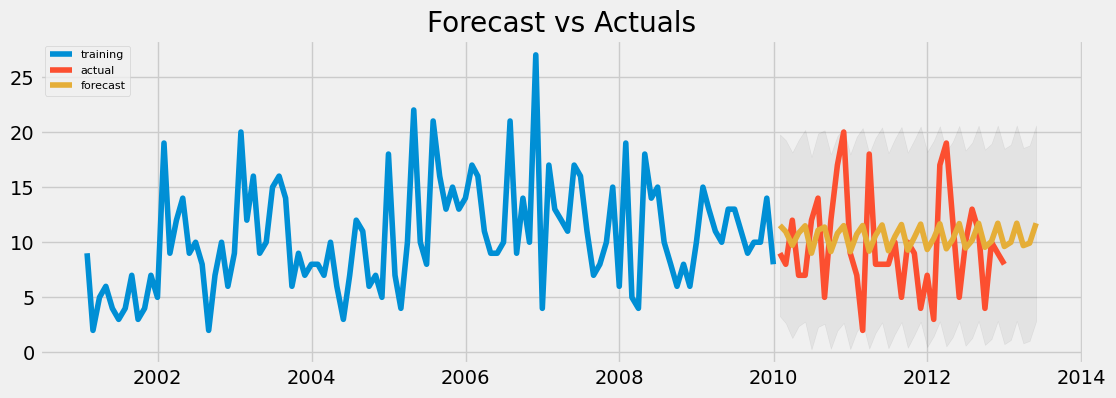

In [45]:
model = ARIMA(train, order=(6, 0, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary
# Forecast
forecast_result_1 = fitted.get_forecast(steps=41, alpha=0.05)

# Extracting forecasted values and confidence intervals
fc_series = forecast_result_1.predicted_mean
conf_int = forecast_result_1.conf_int()

# Extract lower and upper bounds
lower_series = conf_int.iloc[:, 0]
upper_series = conf_int.iloc[:, 1]

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Observation: In both of the adjusted models, every coefficient exhibits statistical significance.However, in both cases, it's noteworthy that the projected forecast (depicted by the yellow line) does not precisely coincide with the observed actual values (represented by the red line). Both trajectories remain within the confidence interval, suggesting that they are not significantly distinguishable. A slight deviation is noticed in the second model, where the red line extends slightly beyond the confidence interval. Therefore, I would favor the first model for further utilization.